In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/victoria-bc-city-tree-species-data/Tree_Species.csv


In [24]:
df = pd.read_csv('/kaggle/input/victoria-bc-city-tree-species-data/Tree_Species.csv')

In [74]:
df.head()

,X,Y,OBJECTID,SiteID,Address,Street,OnStreet,FromStreet,ToStreet,SideOfParcel,...,DiameterAtBreastHeight,GrowSpace,Trunks,Height,Width,TreeCategory,Area,Parks,BotanicalName,CommonName
0,473049.2450,5.362325e+06,1,189,100,DALLAS RD,DALLAS RD,COOK ST,DOUGLAS ST,NaN,...,81.0,Shrub bed,0.0,0.0,0.0,Park Trees,Fairfield,BEACON HILL PARK,Wildlife snag,Wildlife snag
1,473054.9248,5.362394e+06,3,222,100,DALLAS RD,DALLAS RD,COOK ST,DOUGLAS ST,NaN,...,48.0,Turf,1.0,16.0,1.0,Park Trees,James Bay,BEACON HILL PARK,Wildlife snag,Wildlife snag
2,473025.5742,5.362326e+06,4,258,100,DALLAS RD,DALLAS RD,COOK ST,DOUGLAS ST,NaN,...,55.0,Turf,1.0,24.0,8.0,Park Trees,James Bay,BEACON HILL PARK,Wildlife snag,Wildlife snag
3,472875.7893,5.362401e+06,5,281,100,DALLAS RD,DALLAS RD,COOK ST,DOUGLAS ST,NaN,...,40.0,Shrub bed,1.0,7.0,2.0,Park Trees,James Bay,BEACON HILL PARK,Wildlife snag,Wildlife snag
4,472991.8027,5.362416e+06,6,315,100,DALLAS RD,DALLAS RD,COOK ST,DOUGLAS ST,NaN,...,60.0,Shrub bed,1.0,4.0,1.0,Park Trees,James Bay,BEACON HILL PARK,Wildlife snag,Wildlife snag


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33751 entries, 0 to 33750
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   X                       33751 non-null  float64
 1   Y                       33751 non-null  float64
 2   OBJECTID                33751 non-null  int64  
 3   SiteID                  33751 non-null  int64  
 4   Address                 33751 non-null  int64  
 5   Street                  33746 non-null  object 
 6   OnStreet                33746 non-null  object 
 7   FromStreet              33746 non-null  object 
 8   ToStreet                33746 non-null  object 
 9   SideOfParcel            19797 non-null  object 
 10  Site                    33751 non-null  int64  
 11  Species                 33728 non-null  object 
 12  DiameterAtBreastHeight  33746 non-null  float64
 13  GrowSpace               33631 non-null  object 
 14  Trunks                  33746 non-null

In [26]:
df.shape

(33751, 22)

In [28]:
df.describe()

,X,Y,OBJECTID,SiteID,Address,Site,DiameterAtBreastHeight,Trunks,Height,Width
count,33751.000000,3.375100e+04,33751.000000,33751.000000,33751.000000,33751.000000,33746.000000,33746.000000,33746.000000,33746.000000
mean,473491.270278,5.363697e+06,18331.534769,18253.300998,1158.053391,606.291221,35.154470,1.166835,9.557749,7.119820
std,1230.341306,1.416169e+03,9749.428433,10510.429510,1024.934831,1444.884455,25.435077,0.880111,5.521185,4.729479
min,470833.390200,5.361519e+06,1.000000,134.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000
25%,472775.954650,5.362345e+06,9897.500000,8947.500000,200.000000,1.000000,16.000000,1.000000,6.000000,4.000000
50%,473400.778800,5.363551e+06,18335.000000,18287.000000,960.000000,3.000000,31.000000,1.000000,8.000000,6.000000
75%,474440.421150,5.364980e+06,26772.500000,27423.500000,1703.500000,201.000000,48.000000,1.000000,12.000000,10.000000
max,476133.932500,5.366375e+06,35210.000000,36385.000000,29227.000000,30900.000000,267.000000,33.000000,76.000000,321.000000


In [29]:
df.isnull().sum()

X                             0
Y                             0
OBJECTID                      0
SiteID                        0
Address                       0
Street                        5
OnStreet                      5
FromStreet                    5
ToStreet                      5
SideOfParcel              13954
Site                          0
Species                      23
DiameterAtBreastHeight        5
GrowSpace                   120
Trunks                        5
Height                        5
Width                         5
TreeCategory                 20
Area                          5
Parks                     18200
BotanicalName                23
CommonName                   23
dtype: int64

In [31]:
df[['Street', 'OnStreet', 'FromStreet', 'ToStreet', 'SideOfParcel', 'Species', 'DiameterAtBreastHeight', 'GrowSpace', 'Trunks', 'Height', 'Width', 'TreeCategory', 'Area', 'Parks', 'BotanicalName', 'CommonName']]

,Street,OnStreet,FromStreet,ToStreet,SideOfParcel,Species,DiameterAtBreastHeight,GrowSpace,Trunks,Height,Width,TreeCategory,Area,Parks,BotanicalName,CommonName
0,DALLAS RD,DALLAS RD,COOK ST,DOUGLAS ST,NaN,Wildlife snag,81.0,Shrub bed,0.0,0.0,0.0,Park Trees,Fairfield,BEACON HILL PARK,Wildlife snag,Wildlife snag
1,DALLAS RD,DALLAS RD,COOK ST,DOUGLAS ST,NaN,Wildlife snag,48.0,Turf,1.0,16.0,1.0,Park Trees,James Bay,BEACON HILL PARK,Wildlife snag,Wildlife snag
2,DALLAS RD,DALLAS RD,COOK ST,DOUGLAS ST,NaN,Wildlife snag,55.0,Turf,1.0,24.0,8.0,Park Trees,James Bay,BEACON HILL PARK,Wildlife snag,Wildlife snag
3,DALLAS RD,DALLAS RD,COOK ST,DOUGLAS ST,NaN,Wildlife snag,40.0,Shrub bed,1.0,7.0,2.0,Park Trees,James Bay,BEACON HILL PARK,Wildlife snag,Wildlife snag
4,DALLAS RD,DALLAS RD,COOK ST,DOUGLAS ST,NaN,Wildlife snag,60.0,Shrub bed,1.0,4.0,1.0,Park Trees,James Bay,BEACON HILL PARK,Wildlife snag,Wildlife snag
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33746,QUEEN ANNE HTS,QUEEN ANNE HTS,FAIRFIELD RD,DEAD END,Front,Cornus species,11.0,Turf,1.0,5.0,3.0,Setback Trees,Gonzales,NaN,Cornus,Dogwood
33747,CONVENT PL,CONVENT PL,QUADRA ST,VANCOUVER ST,Front,Parrotia persica 'Ruby Vase',6.0,Turf,1.0,3.0,1.0,Boulevard Tree,Fairfield,NaN,Parrotia,Persian ironwood
33748,CONVENT PL,CONVENT PL,QUADRA ST,VANCOUVER ST,Front,Parrotia persica 'Ruby Vase',6.0,Turf,1.0,3.0,1.0,Boulevard Tree,Fairfield,NaN,Parrotia,Persian ironwood
33749,CONVENT PL,CONVENT PL,QUADRA ST,VANCOUVER ST,Front,Parrotia persica 'Ruby Vase',6.0,Turf,1.0,3.0,1.0,Boulevard Tree,Fairfield,NaN,Parrotia,Persian ironwood


In [41]:
df['DiameterAtBreastHeight'].isnull().sum()

0

In [38]:
median = df['DiameterAtBreastHeight'].median()
df['DiameterAtBreastHeight'].fillna(median, inplace = True)

In [39]:
df['DiameterAtBreastHeight'].isnull().sum()

0

In [42]:
df['Trunks']

0        0.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
33746    1.0
33747    1.0
33748    1.0
33749    1.0
33750    1.0
Name: Trunks, Length: 33751, dtype: float64

In [45]:
median1 = df['Trunks'].median()
df['Trunks'].fillna(median1, inplace=True)

In [46]:
df['Trunks'].isnull().sum()

0

In [47]:
df['Height']

0         0.0
1        16.0
2        24.0
3         7.0
4         4.0
         ... 
33746     5.0
33747     3.0
33748     3.0
33749     3.0
33750     3.0
Name: Height, Length: 33751, dtype: float64

In [49]:
median2 = df['Height'].median()
df['Height'].fillna(median2, inplace=True)

In [50]:
df['Height'].isnull().sum()

0

In [55]:
median3 = df['Width'].median()
df['Width'] = df['Width'].fillna(median3)

In [ ]:
df['Width'].isnull

In [65]:
df.isnull().sum()

X                             0
Y                             0
OBJECTID                      0
SiteID                        0
Address                       0
Street                        5
OnStreet                      5
FromStreet                    5
ToStreet                      5
SideOfParcel              13954
Site                          0
Species                      23
DiameterAtBreastHeight        0
GrowSpace                   120
Trunks                        0
Height                        0
Width                         0
TreeCategory                 20
Area                          5
Parks                     18200
BotanicalName                23
CommonName                   23
dtype: int64

In [71]:
data = pd.DataFrame({'categories':['Street', 'OnStreet', 'FromStreet', 'ToStreet', 'SideParcel','Species', 'GrowSpace', 'TreeCategory', 'Area', 'Parks', 'BotanicalName', 'CommonName']})
encode = pd.get_dummies(data[['categories']])
print(encode.astype(int))

    categories_Area  categories_BotanicalName  categories_CommonName  \
0                 0                         0                      0   
1                 0                         0                      0   
2                 0                         0                      0   
3                 0                         0                      0   
4                 0                         0                      0   
5                 0                         0                      0   
6                 0                         0                      0   
7                 0                         0                      0   
8                 1                         0                      0   
9                 0                         0                      0   
10                0                         1                      0   
11                0                         0                      1   

    categories_FromStreet  categories_GrowSpace  categories_OnS

In [75]:
data.isnull().sum()

categories    0
dtype: int64

In [78]:
data.head()

,categories
0,Street
1,OnStreet
2,FromStreet
3,ToStreet
4,SideParcel


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 800x600 with 0 Axes>

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution')

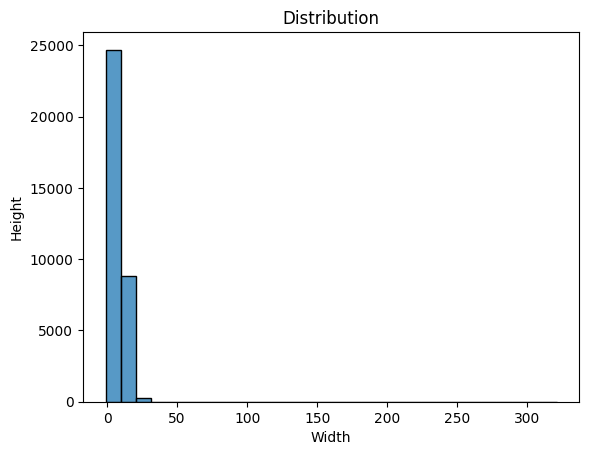

In [89]:
plt.figure(figsize = (8,6))
plt.show()
plt.xlabel('Width')
plt.ylabel('Height')
sns.histplot(df['Width'], bins=30)
plt.title('Distribution')

#Visualization with Matplotlib & Seaborn 

In [92]:

import numpy as np

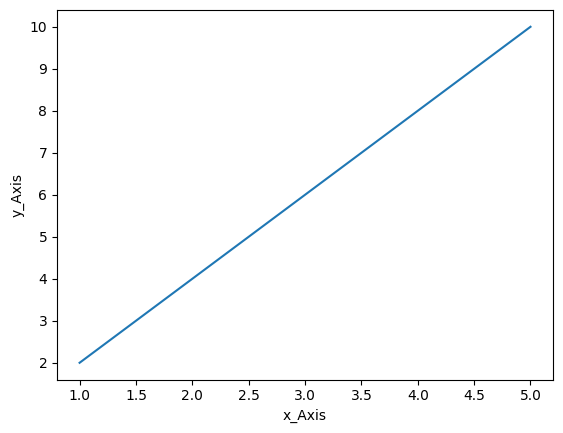

<Figure size 640x480 with 0 Axes>

In [106]:
x = [1,2,3,4,5]
y = [2,4,6,8,10]
plt.xlabel('x_Axis')
plt.ylabel('y_Axis')
plt.plot(x,y)
plt.figure()
plt.show()


<Axes: >

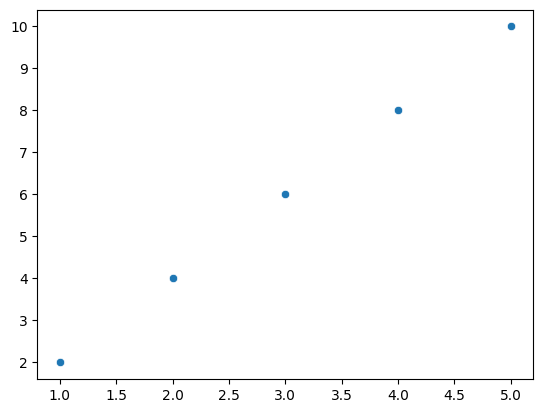

In [108]:
sns.scatterplot(x=x, y=y)

(array([ 1.,  1.,  4.,  2.,  4., 12., 18., 28., 35., 59., 59., 78., 98.,
        95., 86., 92., 93., 63., 46., 44., 28., 19., 20.,  7.,  6.,  1.,
         0.,  0.,  0.,  1.]),
 array([-3.31550123, -3.08124181, -2.84698239, -2.61272297, -2.37846355,
        -2.14420413, -1.90994471, -1.67568528, -1.44142586, -1.20716644,
        -0.97290702, -0.7386476 , -0.50438818, -0.27012876, -0.03586934,
         0.19839008,  0.4326495 ,  0.66690892,  0.90116834,  1.13542776,
         1.36968718,  1.6039466 ,  1.83820602,  2.07246544,  2.30672486,
         2.54098428,  2.7752437 ,  3.00950312,  3.24376254,  3.47802196,
         3.71228138]),
 <BarContainer object of 30 artists>)

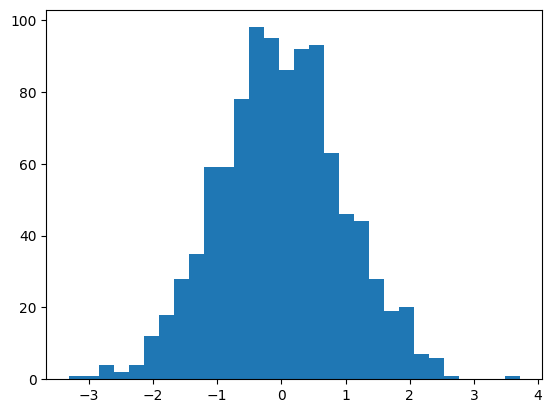

In [110]:
import numpy as np
deta=np.random.randn(1000)
plt.hist(deta, bins=30)